In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import re
import nltk

In [2]:
data = pd.read_json('data_latih.json')

# Removing username, url, kata2 yg sangat singkat, dan simbol2 yg tidak penting

In [3]:
def remove_pattern(input_text, pattern):
    r = re.findall(pattern, input_text)
    for i in r:
        input_text = re.sub(i, '', input_text)
        
    return input_text    

In [4]:
#removing username
data['tweet'] = np.vectorize(remove_pattern)(data['isi'], '@[\w]*')

In [5]:
#removing url
data['tweet'] = np.vectorize(remove_pattern)(data['tweet'],'https?://[A-Za-z0-9./]+')

In [6]:
#removing punctuations, numbers, and special chars
data['tweet'] = data['tweet'].str.replace("[^a-zA-Z#]", " ")

In [7]:
'''removing short words <3 (kurang dari tiga huruf)
data['tweet'] = data['tweet'].apply(lambda x: ' '.join([y for y in x.split() if len(y)>2]))'''

"removing short words <3 (kurang dari tiga huruf)\ndata['tweet'] = data['tweet'].apply(lambda x: ' '.join([y for y in x.split() if len(y)>2]))"

In [8]:
#lowercase tweet, supaya mudah untuk diolah nantinya
data['tweet'] = data['tweet'].str.lower()

# Import data key_norm, dan mengubah singkatan menjadi kata baku

In [9]:
#import data key_norm yg digunakan untuk mengganti kata2 yg disingkat
abv = pd.read_csv('key_norm.csv')
abv.head()

,_id,singkat,hasil
0,1,abis,habis
1,2,accent,tekanan
2,3,accept,terima
3,4,accident,kecelakaan
4,5,achievement,prestasi


In [10]:
#mengubah file key_norm menjadi dictionary, supaya mudah untuk diolah
abv = abv.set_index('singkat')['hasil'].to_dict()

In [11]:
#mengganti kata2 yg disingkat menjadi baku
data['new_text'] = data['tweet'].apply(lambda row: " ".join(abv[w] 
                             if w.lower() in abv else w for w in row.split()))

In [12]:
#Comparison
data[['tweet','new_text']].head()

,tweet,new_text
0,rt penasaran sama #basukidjarot punya #pert...,rt penasaran sama #basukidjarot punya #pertany...
1,melayani warga jakarta mulai dari lahir denga...,melayani warga jakarta mulai dari lahir dengan...
2,golongan sumbu pendek lo fpi piaraan kluarg...,golongan sumbu pendek kamu fpi piaraan keluarg...
3,rt pak ahok itu didzolimi aku yakin pak ...,rt pak ahok itu didzolimi saya yakin pak ahok ...
4,prof edward omar sharif h ahli pidana me...,prof edward omar sharif h ahli pidana menurut ...


# Tokenization

In [13]:
tokenized_tweet = data['new_text'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [rt, penasaran, sama, #basukidjarot, punya, #p...
1    [melayani, warga, jakarta, mulai, dari, lahir,...
2    [golongan, sumbu, pendek, kamu, fpi, piaraan, ...
3    [rt, pak, ahok, itu, didzolimi, saya, yakin, p...
4    [prof, edward, omar, sharif, h, ahli, pidana, ...
Name: new_text, dtype: object

In [14]:
stop_words = open('stopword_list_TALA.txt').read()

In [15]:
data['new_text2'] = data['new_text'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop_words]))

In [16]:
#comparison setelah di stopwords
data[['new_text','new_text2']]

,new_text,new_text2
0,rt penasaran sama #basukidjarot punya #pertany...,penasaran #basukidjarot #pertanyaankepo #kepoi...
1,melayani warga jakarta mulai dari lahir dengan...,melayani warga jakarta lahir program #freeahok
2,golongan sumbu pendek kamu fpi piaraan keluarg...,golongan sumbu pendek fpi piaraan keluarga cen...
3,rt pak ahok itu didzolimi saya yakin pak ahok ...,ahok didzolimi ahok bebas #freeahok
4,prof edward omar sharif h ahli pidana menurut ...,prof edward omar sharif ahli pidana pndpt ahli...
5,rt pak ahok itu didzolimi saya yakin pak ahok ...,ahok didzolimi ahok bebas #freeahok
6,rt pak ahok djarot paling gaul badai yang bisa...,ahok djarot gaul badai menata kota jakarta #fr...
7,rt penasaran sama #basukidjarot punya #pertany...,penasaran #basukidjarot #pertanyaankepo #kepoi...
8,surah al maidah bukan diartikan untuk mengharu...,surah maidah diartikan mengharuskan umat memil...
9,lah ahok di penjara bersih penjara saja biar d...,ahok penjara bersih penjara biar ahok


# MEMBUAT WORDCLOUD

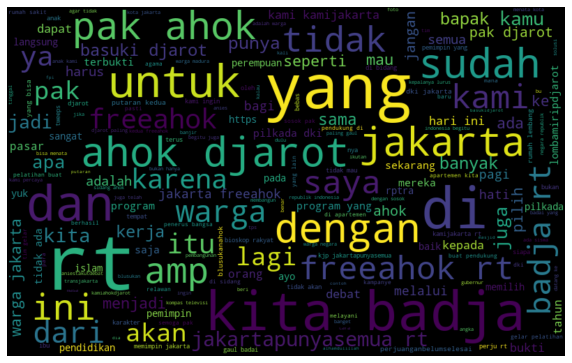

In [17]:
#WORDCLOUD DATA YANG BELUM DI HILANGKAN STOPWORDS
all_words = ' '.join([text for text in data['new_text']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

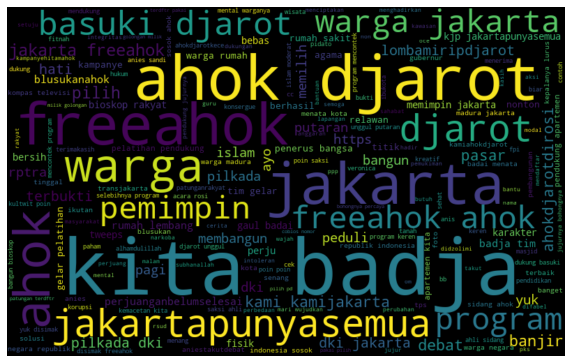

In [18]:
#WORDCLOUD DATA YG SUDAH DI HILANGKAN STOPWORDS
all_words = ' '.join([text for text in data['new_text2']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [19]:
from PIL import Image

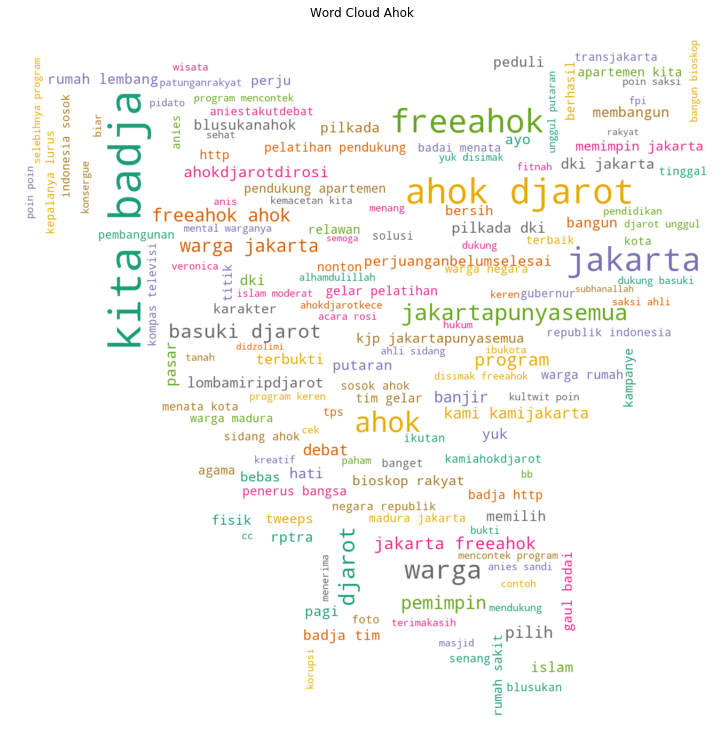

In [20]:
#tampilan dalam peta jakarta
mask = np.array(Image.open("jakarta.png"))
def wordcloud(data, title):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(width=250, height=250, background_color="white", max_font_size=82, min_font_size=4,
                          max_words=150, stopwords=stop_words, colormap='Dark2',
                          random_state=2, mask=mask).generate(" ".join([i for i in data['new_text2']]))
    plt.figure(title, figsize=(10, 10), facecolor='white', edgecolor='blue')
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.tight_layout(pad=0)
    plt.show()
wordcloud(data, 'Word Cloud Ahok')

# Feature Extraction

In [21]:
data.head()

,akun,id_user,isi,sentimen,tanggal,tweet,new_text,new_text2
0,@AhokDjarot,823082326213021696,RT @AhokDjarot: Penasaran sama #BasukiDjarot? ...,netral,Tue Apr 04 14:04:05 +0000 2017,rt penasaran sama #basukidjarot punya #pert...,rt penasaran sama #basukidjarot punya #pertany...,penasaran #basukidjarot #pertanyaankepo #kepoi...
1,@AhokDjarot,3166296157,@AhokDjarot Melayani warga jakarta mulai dari ...,positif,Tue Apr 04 14:00:01 +0000 2017,melayani warga jakarta mulai dari lahir denga...,melayani warga jakarta mulai dari lahir dengan...,melayani warga jakarta lahir program #freeahok
2,@AhokDjarot,799108167170949121,@Lintank01 @AhokDjarot Golongan sumbu pendek l...,negatif,Tue Apr 04 13:56:37 +0000 2017,golongan sumbu pendek lo fpi piaraan kluarg...,golongan sumbu pendek kamu fpi piaraan keluarg...,golongan sumbu pendek fpi piaraan keluarga cen...
3,@AhokDjarot,710566116553166849,RT @RahyaMaya: https://t.co/pvVUIp3YYw Pak Aho...,positif,Tue Apr 04 13:52:44 +0000 2017,rt pak ahok itu didzolimi aku yakin pak ...,rt pak ahok itu didzolimi saya yakin pak ahok ...,ahok didzolimi ahok bebas #freeahok
4,@AhokDjarot,1335669534,Prof. Edward Omar Sharif H. (Ahli Pidana) : Me...,positif,Tue Apr 04 13:50:01 +0000 2017,prof edward omar sharif h ahli pidana me...,prof edward omar sharif h ahli pidana menurut ...,prof edward omar sharif ahli pidana pndpt ahli...


In [22]:
data['sentimen'] = data['sentimen'].replace(to_replace=['negatif', 'positif', 'netral'], value=[0, 1, 2])

In [23]:
data.head()

,akun,id_user,isi,sentimen,tanggal,tweet,new_text,new_text2
0,@AhokDjarot,823082326213021696,RT @AhokDjarot: Penasaran sama #BasukiDjarot? ...,2,Tue Apr 04 14:04:05 +0000 2017,rt penasaran sama #basukidjarot punya #pert...,rt penasaran sama #basukidjarot punya #pertany...,penasaran #basukidjarot #pertanyaankepo #kepoi...
1,@AhokDjarot,3166296157,@AhokDjarot Melayani warga jakarta mulai dari ...,1,Tue Apr 04 14:00:01 +0000 2017,melayani warga jakarta mulai dari lahir denga...,melayani warga jakarta mulai dari lahir dengan...,melayani warga jakarta lahir program #freeahok
2,@AhokDjarot,799108167170949121,@Lintank01 @AhokDjarot Golongan sumbu pendek l...,0,Tue Apr 04 13:56:37 +0000 2017,golongan sumbu pendek lo fpi piaraan kluarg...,golongan sumbu pendek kamu fpi piaraan keluarg...,golongan sumbu pendek fpi piaraan keluarga cen...
3,@AhokDjarot,710566116553166849,RT @RahyaMaya: https://t.co/pvVUIp3YYw Pak Aho...,1,Tue Apr 04 13:52:44 +0000 2017,rt pak ahok itu didzolimi aku yakin pak ...,rt pak ahok itu didzolimi saya yakin pak ahok ...,ahok didzolimi ahok bebas #freeahok
4,@AhokDjarot,1335669534,Prof. Edward Omar Sharif H. (Ahli Pidana) : Me...,1,Tue Apr 04 13:50:01 +0000 2017,prof edward omar sharif h ahli pidana me...,prof edward omar sharif h ahli pidana menurut ...,prof edward omar sharif ahli pidana pndpt ahli...


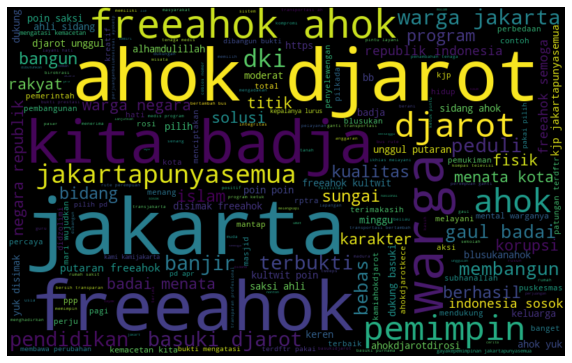

In [24]:
positive_words =' '.join([text for text in data['new_text2'][data['sentimen'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

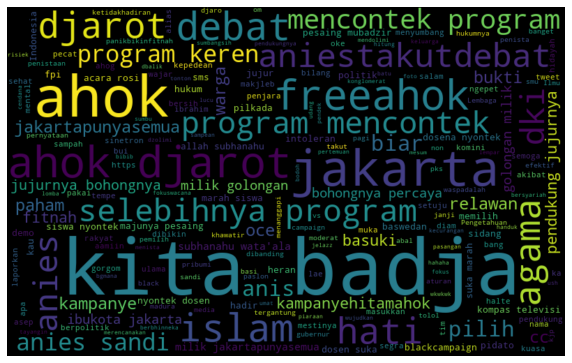

In [25]:
negative_words = ' '.join([text for text in data['new_text2'][data['sentimen'] == 0]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

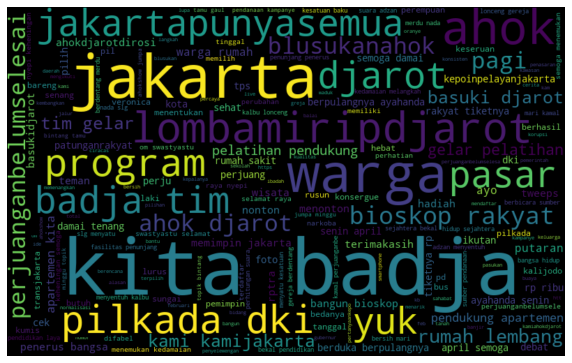

In [26]:
neutral_words =' '.join([text for text in data['new_text2'][data['sentimen'] == 2]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [27]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [28]:
# extracting hashtags from positive tweets

HT_positive = hashtag_extract(data['new_text2'][data['sentimen'] == 1])

# extracting hashtags from negative tweets
HT_negative = hashtag_extract(data['new_text2'][data['sentimen'] == 0])

# unnesting list
HT_positive = sum(HT_positive,[])
HT_negative = sum(HT_negative,[])

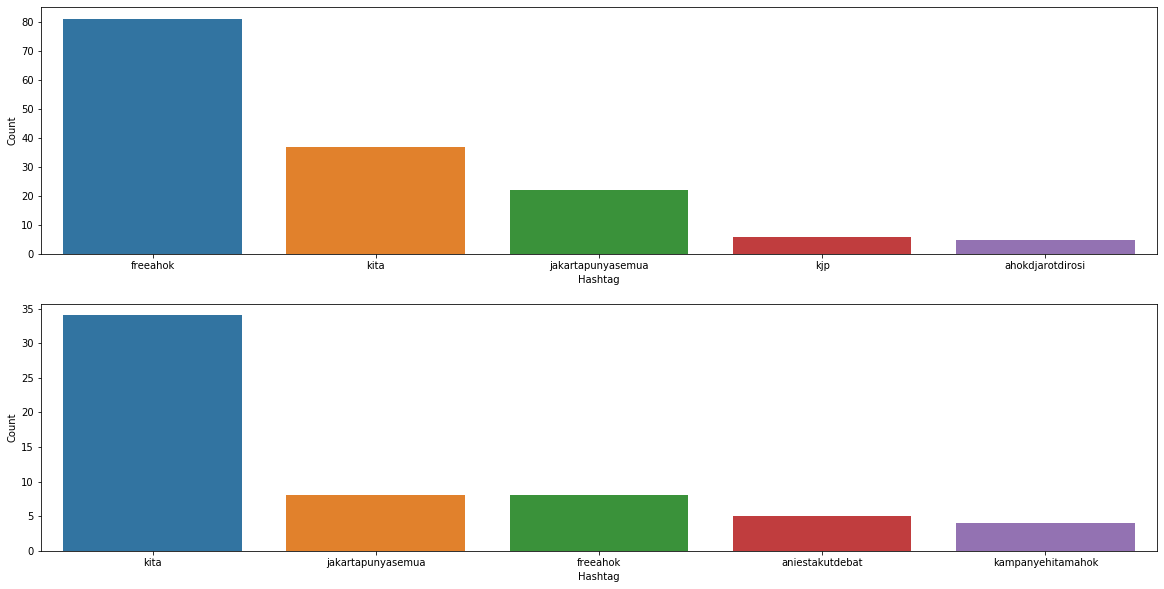

<Figure size 1440x720 with 0 Axes>

In [29]:
a = nltk.FreqDist(HT_positive)
pos = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
b = nltk.FreqDist(HT_negative)
neg = pd.DataFrame({'Hashtag': list(b.keys()),
                  'Count': list(b.values())})
# selecting top 5 most frequent hashtags     
f, axes = plt.subplots(2, 1, figsize=(20,10))
pos = pos.nlargest(columns="Count", n = 5) 
neg = neg.nlargest(columns="Count", n = 5)
plt.figure(figsize=(20,10))
sns.barplot(data=pos, x= "Hashtag", y = "Count", ax=axes[0])
sns.barplot(data=neg, x= "Hashtag", y = "Count", ax=axes[1])
plt.show()

# EXTRACTING FEATURES FROM BAG OF WORDS

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000)
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(data['new_text2'])

# EXTRACTING FEATURES FROM TF-IDF

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000)
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(data['new_text2'])

In [32]:
tfidf_vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.9, max_features=1000,
                min_df=2, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

# CLASSIFICATION OF BOW USING LOGISTIC, RF, DT

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

train_bow = bow

# splitting data into training and validation set
Xtrain_bow, Xtest_bow, ytrain, ytest = train_test_split(train_bow, data['sentimen'], random_state=101, test_size=0.3)

In [34]:
logreg = LogisticRegression()
logreg.fit(Xtrain_bow, ytrain) # training the model
prediction = logreg.predict(Xtest_bow) # predicting on the validation set
print(classification_report(ytest,prediction))

              precision    recall  f1-score   support

           0       0.52      0.75      0.62        48
           1       0.75      0.65      0.70        92
           2       0.72      0.60      0.65        55

    accuracy                           0.66       195
   macro avg       0.66      0.67      0.66       195
weighted avg       0.68      0.66      0.66       195



C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200)
rf.fit(Xtrain_bow, ytrain) # training the model

prediction = rf.predict(Xtest_bow) # predicting on the validation set
print(classification_report(ytest,prediction))

              precision    recall  f1-score   support

           0       0.46      0.77      0.58        48
           1       0.70      0.53      0.60        92
           2       0.67      0.55      0.60        55

    accuracy                           0.59       195
   macro avg       0.61      0.62      0.59       195
weighted avg       0.63      0.59      0.60       195



In [36]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(Xtrain_bow,ytrain)

prediction = dtree.predict(Xtest_bow)
print(classification_report(ytest,prediction))

              precision    recall  f1-score   support

           0       0.45      0.71      0.55        48
           1       0.65      0.53      0.59        92
           2       0.62      0.51      0.56        55

    accuracy                           0.57       195
   macro avg       0.58      0.58      0.57       195
weighted avg       0.60      0.57      0.57       195



# CLASSIFICATION OF TF-IDF USING LOGISTIC, RF, DT

In [37]:
train_tfidf = tfidf

# splitting data into training and validation set
Xtrain_tfidf, Xtest_tfidf, ytrain, ytest = train_test_split(train_tfidf, data['sentimen'], random_state=101, test_size=0.3)

In [38]:
logreg = LogisticRegression()
logreg.fit(Xtrain_tfidf, ytrain) # training the model
prediction = logreg.predict(Xtest_tfidf) # predicting on the validation set
print(classification_report(ytest,prediction))

              precision    recall  f1-score   support

           0       0.72      0.48      0.57        48
           1       0.63      0.88      0.74        92
           2       0.74      0.47      0.58        55

    accuracy                           0.67       195
   macro avg       0.70      0.61      0.63       195
weighted avg       0.69      0.67      0.65       195



C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [39]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200)
rf.fit(Xtrain_tfidf, ytrain) # training the model

prediction = rf.predict(Xtest_tfidf) # predicting on the validation set
print(classification_report(ytest,prediction))

              precision    recall  f1-score   support

           0       0.49      0.77      0.60        48
           1       0.71      0.62      0.66        92
           2       0.72      0.51      0.60        55

    accuracy                           0.63       195
   macro avg       0.64      0.63      0.62       195
weighted avg       0.66      0.63      0.63       195



In [40]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(Xtrain_tfidf,ytrain)

prediction = dtree.predict(Xtest_tfidf)
print(classification_report(ytest,prediction))

              precision    recall  f1-score   support

           0       0.46      0.75      0.57        48
           1       0.65      0.58      0.61        92
           2       0.63      0.40      0.49        55

    accuracy                           0.57       195
   macro avg       0.58      0.58      0.56       195
weighted avg       0.60      0.57      0.57       195

